## Target Feature: Spoilage Status (0,1)
## Classification


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel("food_spoilage_dataset .xlsx")
df.head()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
0,222,364,13.69,88.57,0
1,469,637,13.47,87.28,1
2,95,16,13.25,88.69,0
3,250,411,13.18,88.24,0
4,94,45,14.74,87.37,0


In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ethylene (ppm)   200 non-null    int64  
 1   CO2 (ppm)        200 non-null    int64  
 2   Temperature (C)  200 non-null    float64
 3   Humidity (%RH)   200 non-null    float64
 4   Spoilage_Status  200 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

Ethylene (ppm)     0
CO2 (ppm)          0
Temperature (C)    0
Humidity (%RH)     0
Spoilage_Status    0
dtype: int64

In [10]:
df.describe()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
count,200.000000,200.000000,200.000000,200.00000,200.000000
mean,223.860000,349.415000,14.607950,86.43965,0.500000
std,139.626855,210.894417,4.605257,8.75648,0.501255
min,2.000000,5.000000,5.210000,60.12000,0.000000
25%,104.750000,170.500000,13.200000,85.83250,0.000000
50%,205.500000,365.500000,13.915000,88.20000,0.500000
75%,329.500000,537.500000,14.692500,90.73250,1.000000
max,496.000000,699.000000,29.850000,99.94000,1.000000


In [11]:
df.corr()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
Ethylene (ppm),1.000000,0.285953,0.186159,-0.155159,0.513364
CO2 (ppm),0.285953,1.000000,0.099355,-0.166030,0.522635
Temperature (C),0.186159,0.099355,1.000000,-0.020906,0.134803
Humidity (%RH),-0.155159,-0.166030,-0.020906,1.000000,-0.250768
Spoilage_Status,0.513364,0.522635,0.134803,-0.250768,1.000000


<Axes: >

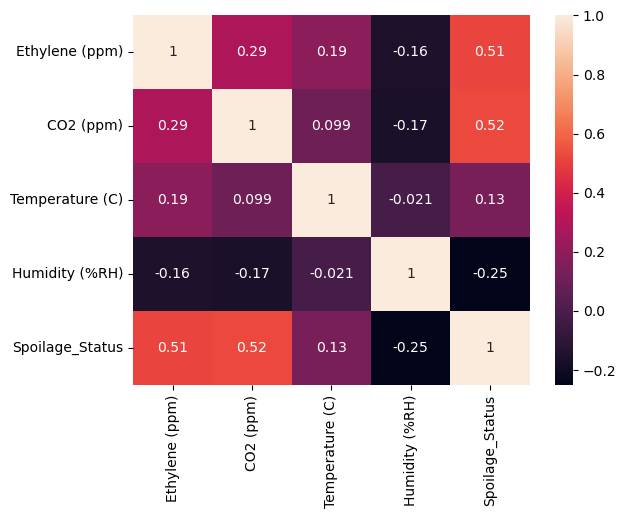

In [19]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
0,222,364,13.69,88.57,0
1,469,637,13.47,87.28,1
2,95,16,13.25,88.69,0
3,250,411,13.18,88.24,0
4,94,45,14.74,87.37,0


<Axes: xlabel='Spoilage_Status'>

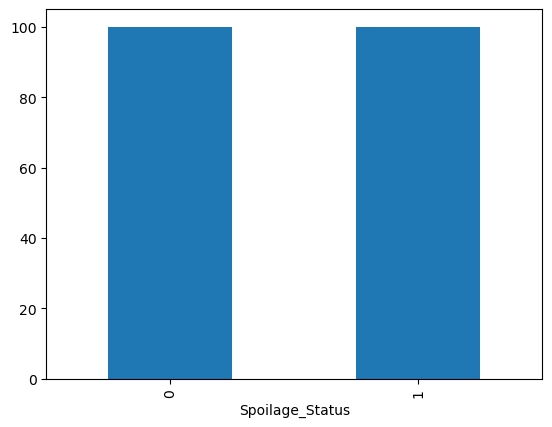

In [18]:
df['Spoilage_Status'].value_counts().plot(kind='bar')

This is a balanced Dataset

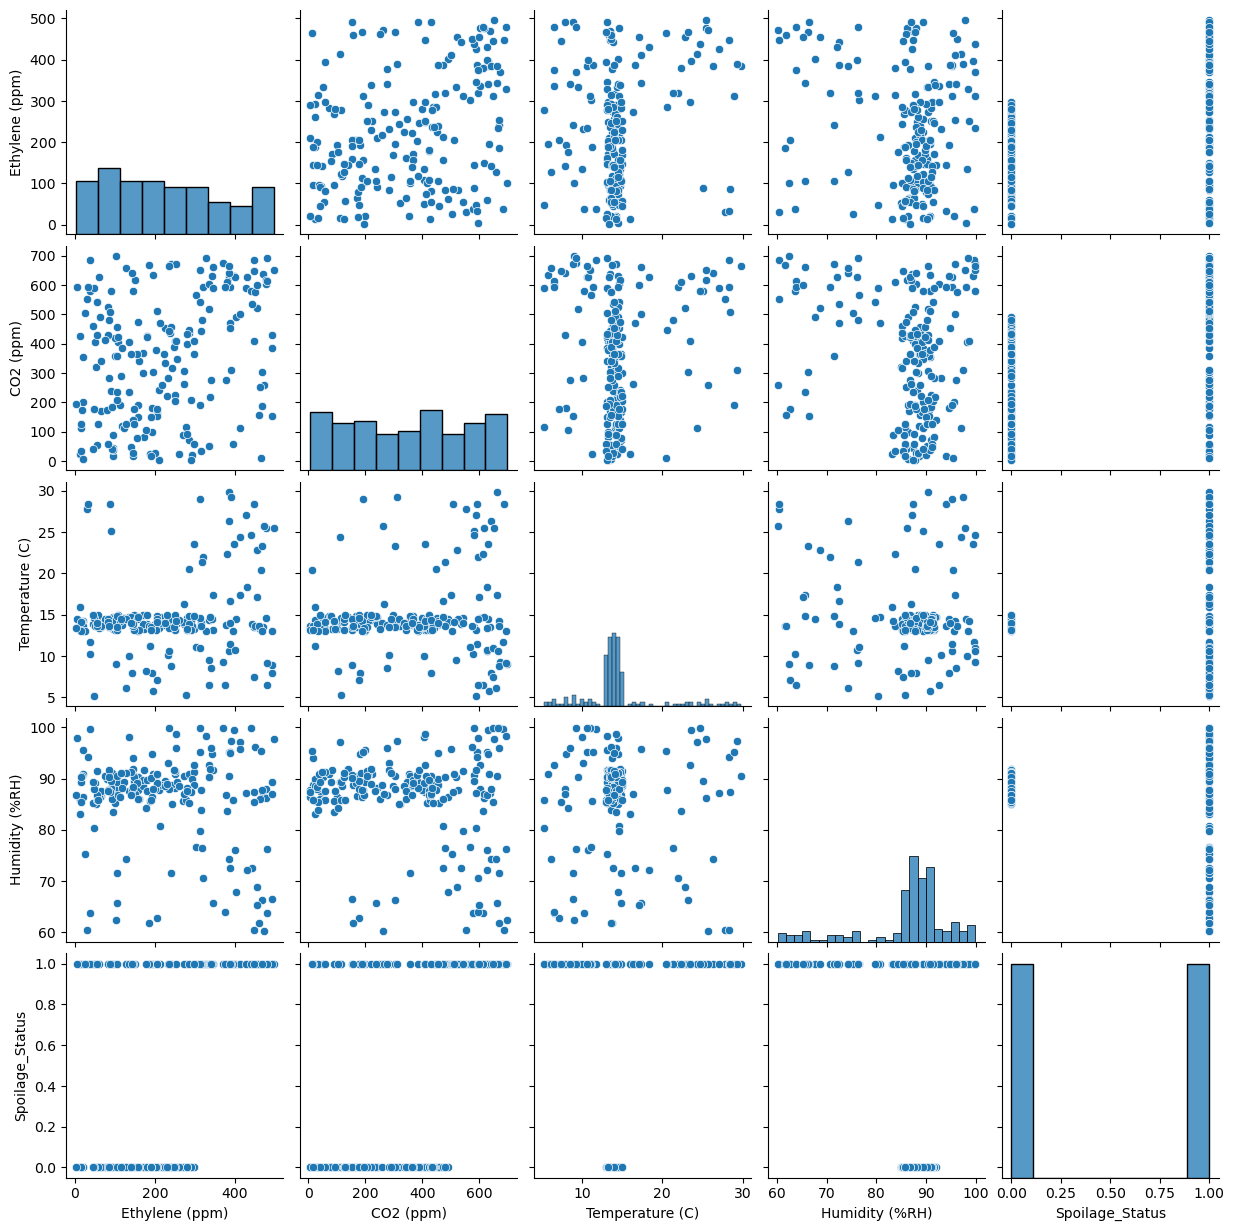

In [22]:
sns.pairplot(df)

In [23]:
df.head()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
0,222,364,13.69,88.57,0
1,469,637,13.47,87.28,1
2,95,16,13.25,88.69,0
3,250,411,13.18,88.24,0
4,94,45,14.74,87.37,0


## Independent And Dependent Feature

In [24]:
X=df.drop(columns=['Spoilage_Status'])
y=df['Spoilage_Status']

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [33]:
X_train.shape,X_test.shape

((160, 4), (40, 4))

### Exporting the Scaler Pickle file

In [53]:
import pickle

In [54]:
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

## Model Training And Model Selection

In [36]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#### Create Function to Evaluate the metrics

In [37]:
def evaluate_model(true,predict):
    accuracy=accuracy_score(true,predict)
    precision=precision_score(true,predict)
    recall=recall_score(true,predict)
    f1=f1_score(true,predict)
    return accuracy,precision,recall,f1

In [43]:
models={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "SVC":SVC(),
    "BernoulliNB":BernoulliNB(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

In [44]:
accuracy_list=[]
model_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

# Make Predication
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

# Evaluate Train and Test Data
    model_train_accuracy,model_train_precision,model_train_recall,model_train_f1=evaluate_model(y_train,y_train_pred)
    model_test_accuracy,model_test_precision,model_test_recall,model_test_f1=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("Accuracy: ",model_train_accuracy)
    print("Precision: ",model_train_precision)
    print("Recall: ",model_train_recall)
    print("F1 Score: ",model_train_f1)

    print("------------------------------------")

    print("Model Performance for Test set")
    print("Accuracy: ",model_test_accuracy)
    print("Precision: ",model_test_precision)
    print("Recall: ",model_test_recall)
    print("F1 Score: ",model_test_f1)
    accuracy_list.append(model_test_accuracy)

    print("="*40)
    print("\n")


LogisticRegression
Model Performance for Training Set
Accuracy:  0.8125
Precision:  0.8292682926829268
Recall:  0.8095238095238095
F1 Score:  0.8192771084337349
------------------------------------
Model Performance for Test set
Accuracy:  0.85
Precision:  0.7777777777777778
Recall:  0.875
F1 Score:  0.8235294117647058


KNeighborsClassifier
Model Performance for Training Set
Accuracy:  0.9125
Precision:  1.0
Recall:  0.8333333333333334
F1 Score:  0.9090909090909091
------------------------------------
Model Performance for Test set
Accuracy:  0.975
Precision:  1.0
Recall:  0.9375
F1 Score:  0.967741935483871


SVC
Model Performance for Training Set
Accuracy:  0.91875
Precision:  1.0
Recall:  0.8452380952380952
F1 Score:  0.9161290322580645
------------------------------------
Model Performance for Test set
Accuracy:  0.975
Precision:  1.0
Recall:  0.9375
F1 Score:  0.967741935483871


BernoulliNB
Model Performance for Training Set
Accuracy:  0.75
Precision:  0.84375
Recall:  0.6428571

In [46]:
pd.DataFrame(list(zip(model_list,accuracy_list)),columns=["Model Name","Accuracy Score"]).sort_values(by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
4,DecisionTreeClassifier,1.000
1,KNeighborsClassifier,0.975
5,RandomForestClassifier,0.975
2,SVC,0.975
6,GradientBoostingClassifier,0.975
7,AdaBoostClassifier,0.975
0,LogisticRegression,0.850
3,BernoulliNB,0.775


### DecisionTreeClassifier	1.000 -> OverFitting
### KNeighborsClassifier/ SVC	->	0.975  Best Option


In [47]:
kNeighbor=KNeighborsClassifier()
kNeighbor.fit(X_train,y_train)
y_pred=kNeighbor.predict(X_test)

In [48]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [49]:
accuracy_score(y_test,y_pred)

0.975

## Exporting the Model and DataFrame using Pickle

In [ ]:
import pickle

In [51]:
with open("dataframe.pkl","wb") as file:
    pickle.dump(X_train,file)

In [50]:
with open ("model.pkl","wb") as file:
    pickle.dump(kNeighbor,file)
    

In [52]:
df.head()

,Ethylene (ppm),CO2 (ppm),Temperature (C),Humidity (%RH),Spoilage_Status
0,222,364,13.69,88.57,0
1,469,637,13.47,87.28,1
2,95,16,13.25,88.69,0
3,250,411,13.18,88.24,0
4,94,45,14.74,87.37,0
